## R 기본제공 graphics-2

### 그래프 유형

## 원도표
- 데이터 유형을 벡터, 테이블, 데이터 프레임으로 지정하는게 좋다 => 별도의 과정없이 원도표 바로 만들어주기 때문
- labels : 실제 표시되는 각 구역의 레이블
- labels 옵션에 paste함수 이용해서 보다 자세한 표기 가능 

 'table' num [1:4, 1:2, 1:2, 1:2] 0 0 35 0 0 0 17 0 118 154 ...
 - attr(*, "dimnames")=List of 4
  ..$ Class   : chr [1:4] "1st" "2nd" "3rd" "Crew"
  ..$ Sex     : chr [1:2] "Male" "Female"
  ..$ Age     : chr [1:2] "Child" "Adult"
  ..$ Survived: chr [1:2] "No" "Yes"


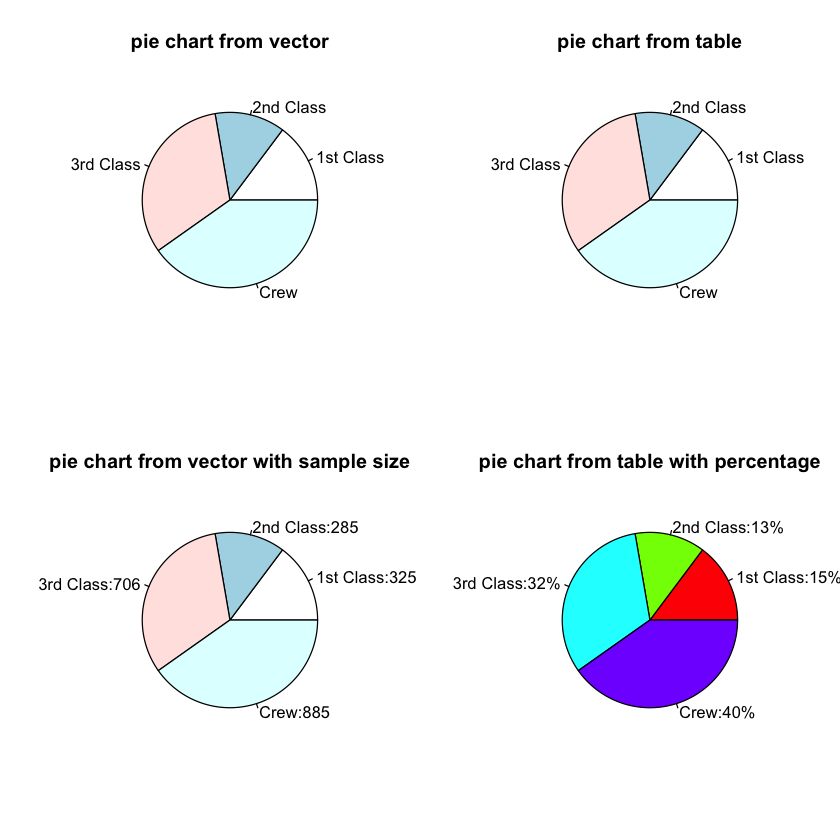

In [18]:
par(mfrow = c(2,2))
slice <-c(325,285,706,885)
label <-c('1st Class',"2nd Class","3rd Class","Crew")
pie(slice,labels=label,main='pie chart from vector')

str(Titanic)
class.table<-margin.table(Titanic,margin=1)
label <-c('1st Class',"2nd Class","3rd Class","Crew")
pie(class.table,labels=label,main='pie chart from table')

slice <-c(325,285,706,885)
label <-c('1st Class',"2nd Class","3rd Class","Crew")
label<-paste(label,slice,sep=":")
pie(slice,labels=label,main='pie chart from vector with sample size')


class.table<-margin.table(Titanic,margin=1)
label <-c('1st Class',"2nd Class","3rd Class","Crew")
label<-paste(label,":",round(class.table/sum(class.table)*100),"%",sep="")
pie(class.table,labels=label,main='pie chart from table with percentage',
   col=rainbow(length(class.table)))

## 막대도표

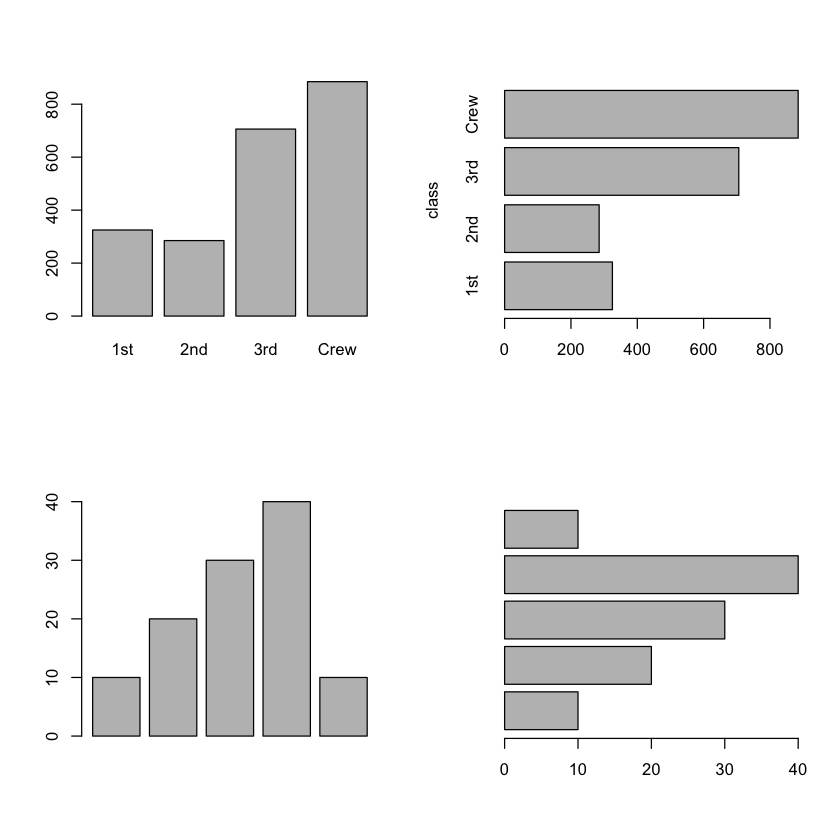

In [25]:
# 1차원 데이타

# 1차원 테이블
par(mfrow=c(2,2))
class.table <- margin.table(Titanic,1)
barplot(class.table)
barplot(class.table,ylab='class',horiz = T)
# 1차원 벡터
barplot(c(10,20,30,40,10))
barplot(c(10,20,30,40,10),horiz = T)

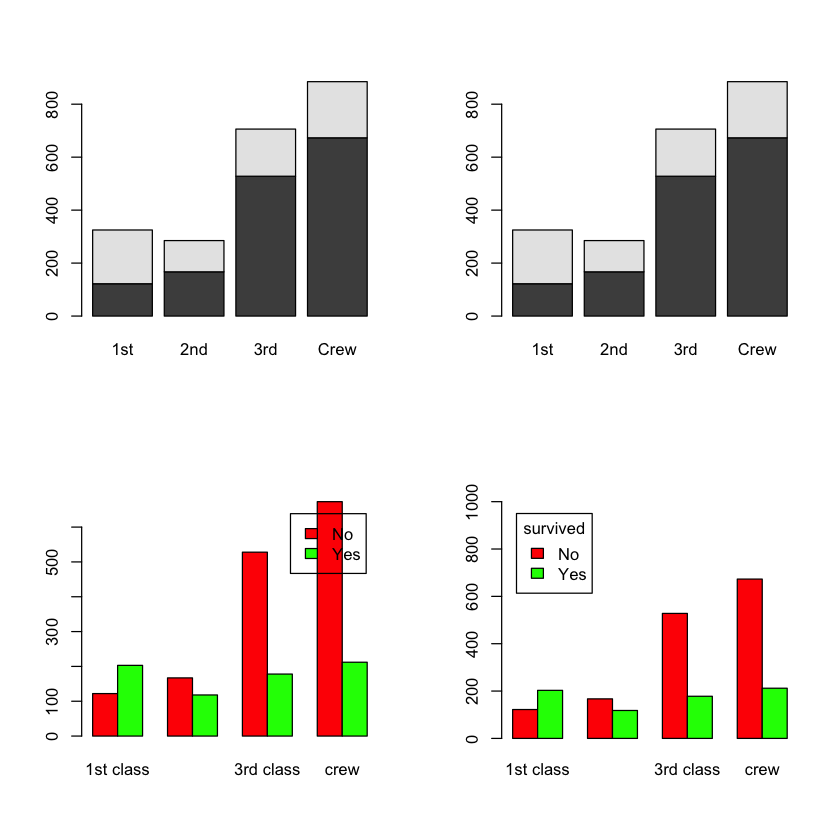

In [46]:
# 2차원 데이타(행렬,테이블) => 막대가 쌓인다
par(mfrow=c(2,2))
# 행렬 
survived.by.class<-margin.table(Titanic,c(4,1))
barplot(survived.by.class)
barplot(as.matrix(survived.by.class))

barplot(survived.by.class,beside = T,
        names.arg = c('1st class','2nd class','3rd class','crew'),
       col=c('red','green'),legend=T) #legned 옵션이 가린다 아래에 명시적으로 쓰자


barplot(survived.by.class,beside = T,ylim=c(0,1000),
        names.arg = c('1st class','2nd class','3rd class','crew'),
       col=c('red','green'))
legend('topleft',legend = c('No','Yes'),inset=0.05,
       title='survived',fill=c('red','green'))


        Class
Survived       1st       2nd       3rd      Crew
     No  0.3753846 0.5859649 0.7478754 0.7604520
     Yes 0.6246154 0.4140351 0.2521246 0.2395480

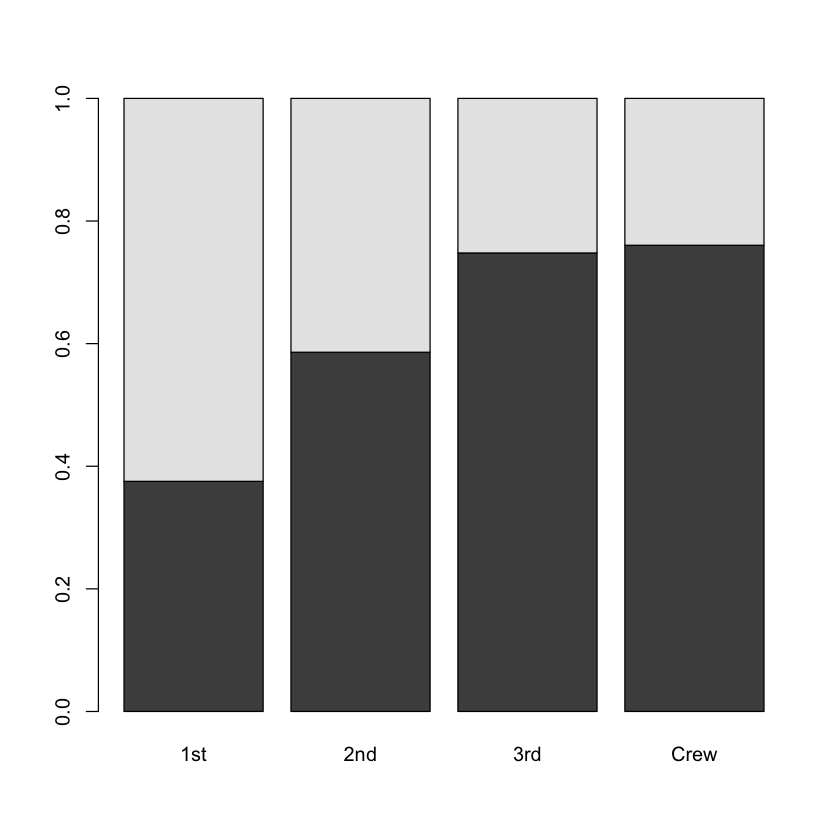

In [51]:
#척도 100%로 조정된 막대도표
#아래가 Survived No
#위에 Survived Yes
survived.by.class<-margin.table(Titanic,c(4,1))
prop.table(survived.by.class,margin=2) # margin을 1로 주면 행의 비율 2로주변 열의 비율
survived.prop <- prop.table(survived.by.class,margin=2)
barplot(survived.prop)

#그래프를 보면 1등석이 생존자의 비율이 제일 높다느걸 알수 있다

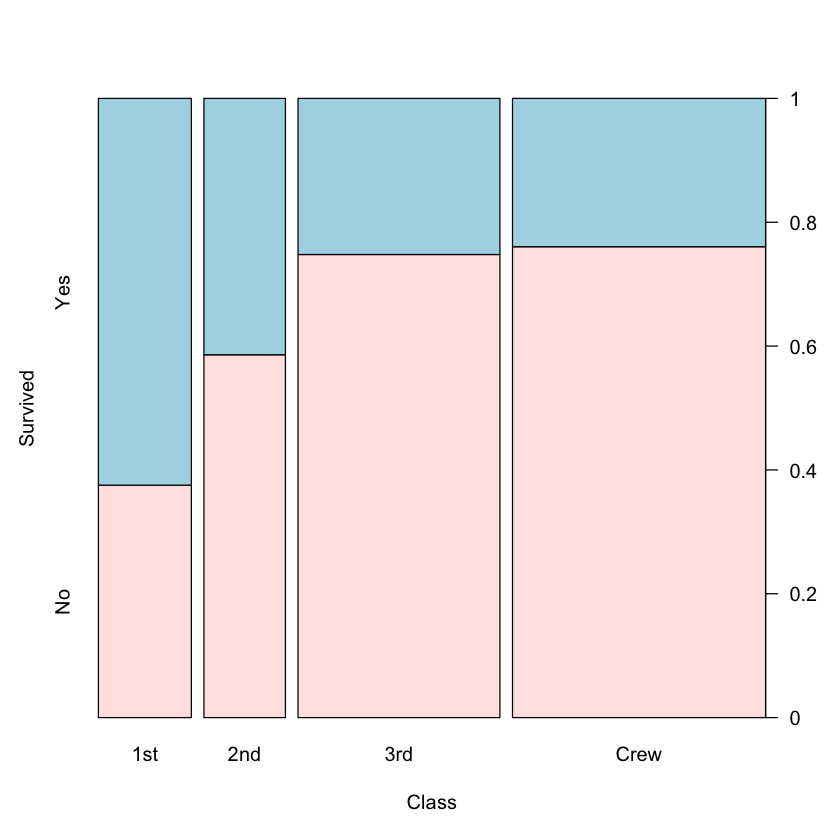

In [55]:
# 스파인 도표
# 테이블을 비율 형식으로 굳이 변경하지 않고 바로 인수로 사용 가능하다
library(vcd)
survived.by.class<-margin.table(Titanic,c(4,1))
spine(t(survived.by.class),gp=gpar(fill=c('mistyrose','lightblue')))

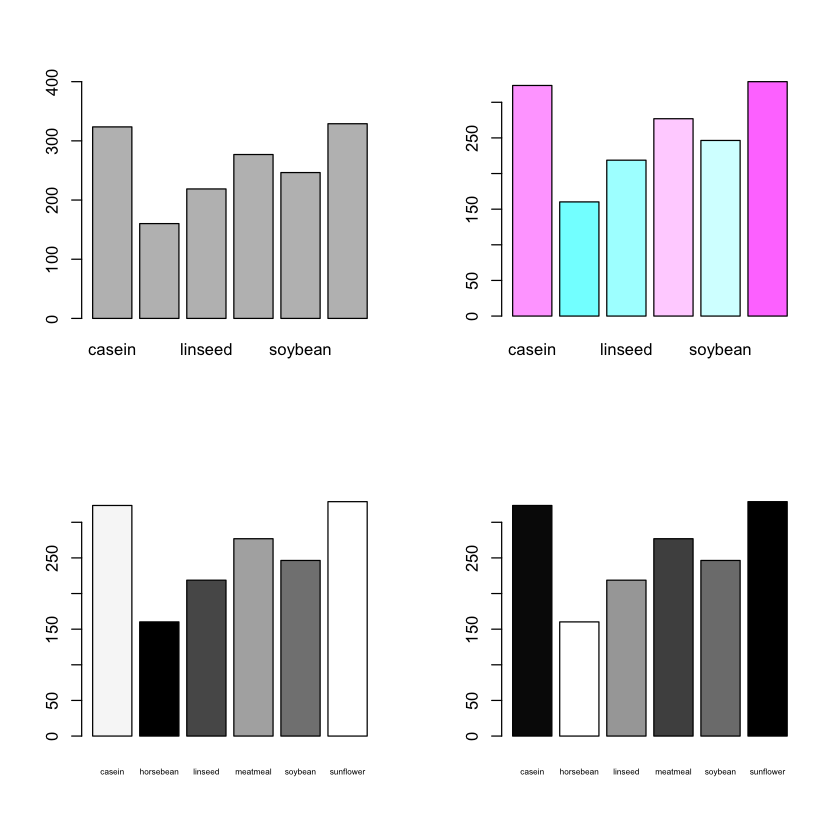

In [77]:
# 색상 그라데이션을 통해 비교를 쉽게해보자
# 색상 파레트 이용가능 cm.colors 혹은 gray를 이용해보자

par(mfrow=c(2,2))
heights <- tapply(chickwts$weight,chickwts$feed,mean)
barplot(heights,ylim=c(0,400))

# cm.colors : 색상 파레트 인덱스 높을수록 자주색 이다
rel.heights <- (heights-min(heights))/(max(heights)-min(heights))
barplot(heights,col=cm.colors(length(rel.heights))[rank(rel.heights)])

# gray : 0~1사이 0에 가까울수록 검은색, 1에 가까울수록 흰색
barplot(heights,col=gray(rel.heights),cex.names = 0.5)
barplot(heights,col=gray(1-rel.heights),cex.names = 0.5)

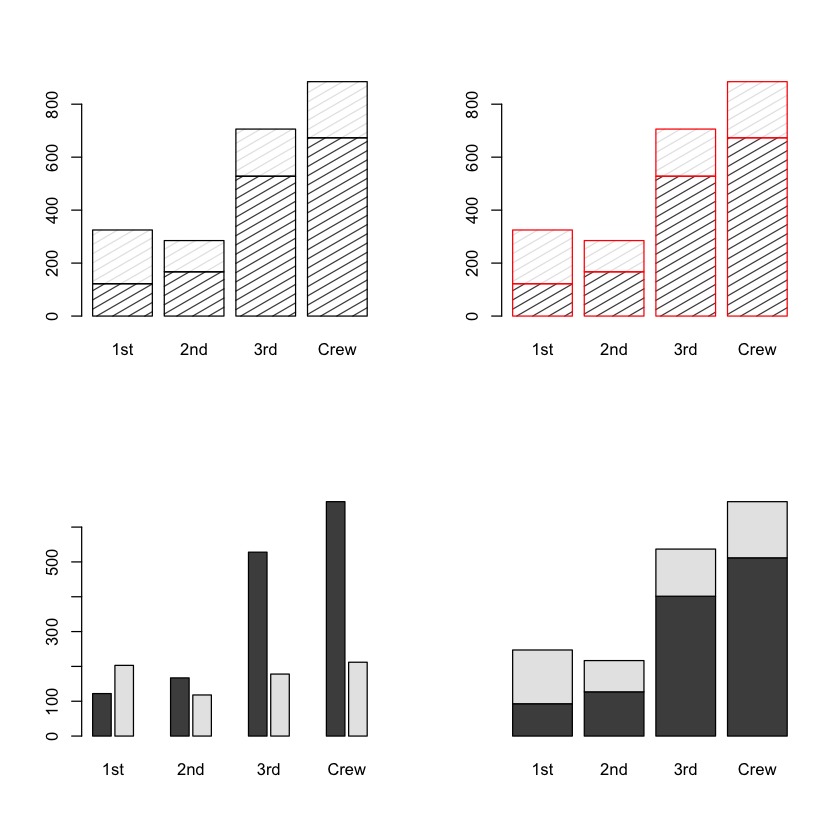

In [86]:
# 다양한 인수 존재
# density angle border space
par(mfrow=c(2,2))
survived.by.class<-margin.table(Titanic,c(4,1))
barplot(survived.by.class,density = 15,angle=30)
barplot(survived.by.class,density = 15,angle=30,border='red')
barplot(survived.by.class,beside=T,space=c(0.2,2)) # space 첫 인자 집단 내 간격, 두번째 인자 집단 간 간격
barplot(survived.by.class,axes = F)

## 히스토그램